In [70]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
sns.set_style("whitegrid")
sns.set_palette("colorblind")

In [2]:
years = list(range(1980, 2021))
pubs_renewable = [140, 188, 170, 168, 226, 167, 135, 119, 101, 122, 156, 190, 272, 279, 376, 284, 436, 384, 389, 401, 532, 777, 1008, 1427, 1689, 2074, 2414, 3452, 5256, 5668, 6058, 7671, 8972, 10101, 11362, 11656, 13625, 16024, 17999, 21173, 11916]
pubs_energy = [29414, 31114, 32080, 35418, 37805, 38063, 36245, 35611, 35488, 38651, 39565, 43342, 43732, 49231, 53558, 55163, 63704, 65268, 66079, 67623, 75352, 80184, 85835, 93293, 106902, 115845, 118515, 127306, 138525, 147398, 157844, 176052, 186907, 200520, 212975, 220282, 233189, 258110, 270728, 294170, 179887]
pubs_solar = [36, 52, 51, 61, 79, 60, 58, 38, 28, 36, 52, 63, 72, 78, 117, 78, 131, 102, 110, 103, 110, 153, 211, 300, 356, 418, 507, 703, 955, 1101, 1225, 1705, 2153, 2355, 2765, 2746, 3121, 3850, 4517, 5170, 3083]
pubs_pv = [4, 8, 4, 19, 22, 24, 14, 7, 8, 13, 10, 20, 24, 22, 64, 32, 62, 42, 57, 30, 56, 70, 101, 146, 151, 201, 241, 331, 425, 544, 625, 882, 1100, 1294, 1583, 1629, 1883, 2304, 2712, 3333, 1688]

list(zip(years, pubs_pv, pubs_solar, pubs_renewable, pubs_energy))

[(1980, 4, 36, 140, 29414),
 (1981, 8, 52, 188, 31114),
 (1982, 4, 51, 170, 32080),
 (1983, 19, 61, 168, 35418),
 (1984, 22, 79, 226, 37805),
 (1985, 24, 60, 167, 38063),
 (1986, 14, 58, 135, 36245),
 (1987, 7, 38, 119, 35611),
 (1988, 8, 28, 101, 35488),
 (1989, 13, 36, 122, 38651),
 (1990, 10, 52, 156, 39565),
 (1991, 20, 63, 190, 43342),
 (1992, 24, 72, 272, 43732),
 (1993, 22, 78, 279, 49231),
 (1994, 64, 117, 376, 53558),
 (1995, 32, 78, 284, 55163),
 (1996, 62, 131, 436, 63704),
 (1997, 42, 102, 384, 65268),
 (1998, 57, 110, 389, 66079),
 (1999, 30, 103, 401, 67623),
 (2000, 56, 110, 532, 75352),
 (2001, 70, 153, 777, 80184),
 (2002, 101, 211, 1008, 85835),
 (2003, 146, 300, 1427, 93293),
 (2004, 151, 356, 1689, 106902),
 (2005, 201, 418, 2074, 115845),
 (2006, 241, 507, 2414, 118515),
 (2007, 331, 703, 3452, 127306),
 (2008, 425, 955, 5256, 138525),
 (2009, 544, 1101, 5668, 147398),
 (2010, 625, 1225, 6058, 157844),
 (2011, 882, 1705, 7671, 176052),
 (2012, 1100, 2153, 8972, 186

In [162]:
df_pub = pd.DataFrame({"years":years, "pubs_pv":pubs_pv, "pubs_solar":pubs_solar, "pubs_renewable":pubs_renewable, "pubs_energy":pubs_energy})
df_pub["pv/solar"] = df_pub["pubs_pv"]/df_pub["pubs_solar"]*100
df_pub["solar/RE"] = df_pub["pubs_solar"]/df_pub["pubs_renewable"]*100
df_pub["RE/E"] = df_pub["pubs_renewable"]/df_pub["pubs_energy"]*100
df_pub["pv/RE"] = df_pub["pubs_pv"]/df_pub["pubs_renewable"]*100
df_pub["solar/E"] = df_pub["pubs_solar"]/df_pub["pubs_energy"]*100
df_pub["pv/E"] = df_pub["pubs_pv"]/df_pub["pubs_energy"]*100
df_pub.head()

,years,pubs_pv,pubs_solar,pubs_renewable,pubs_energy,pv/solar,solar/RE,RE/E,pv/RE,solar/E,pv/E
0,1980,4,36,140,29414,11.111111,25.714286,0.475964,2.857143,0.122391,0.013599
1,1981,8,52,188,31114,15.384615,27.659574,0.604230,4.255319,0.167127,0.025712
2,1982,4,51,170,32080,7.843137,30.000000,0.529925,2.352941,0.158978,0.012469
3,1983,19,61,168,35418,31.147541,36.309524,0.474335,11.309524,0.172229,0.053645
4,1984,22,79,226,37805,27.848101,34.955752,0.597805,9.734513,0.208967,0.058193


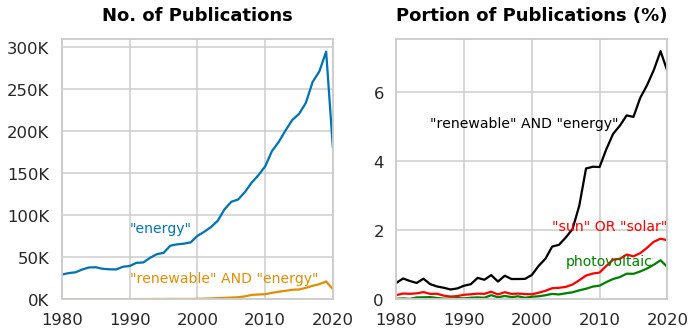

In [170]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))

# 0. energy

ax[0].plot(df_pub["years"], df_pub["pubs_energy"], label='"energy"')
ax[0].plot(df_pub["years"], df_pub["pubs_renewable"], label='"renewable"AND"energy"')
ax[0].set_ylim(0,)
ax[0].set_xlim(1980, 2020)

yticks = ax[0].get_yticks()
ax[0].set_yticklabels([f"{int(y/1000)}K" for y in yticks])

# ax[0].legend(bbox_to_anchor=(0., 1, 1., 0), loc='lower left', title="Query @SCOPUS", title_fontsize=16)
ax[0].set_title("No. of Publications", y=1.05, # y=1.5, 
                fontdict={"fontweight":"bold", "color":"k"})
ax[0].text(1990, 20000, '"renewable" AND "energy"', 
           fontdict={"fontsize":14, "color": "C1"})
ax[0].text(1990, 80000, '"energy"', 
           fontdict={"fontsize":14, "color": "C0"})

# 1. portion

ax[1].plot(df_pub["years"], df_pub["RE/E"], c="k")
ax[1].set_ylim(0,)
ax[1].set_xlim(1980, 2020)
ax[1].set_title("Portion of Publications (%)", y=1.05, # y=1.5, 
                fontdict={"fontweight":"bold", "color":"k"})
ax[1].text(1985, 5, '"renewable" AND "energy"',  
                fontdict={"color":"k", "fontsize":14})

ax[1].plot(df_pub["years"], df_pub["solar/E"], c="r")
ax[1].text(2003, 2, '"sun" OR "solar"',  
           fontdict={"color":"r", "fontsize":14})


ax[1].plot(df_pub["years"], df_pub["pv/E"], c="green")
ax[1].text(2005, 1, 'photovoltaic',  
           fontdict={"color":"green", "fontsize":14})
                                   

                                   

plt.tight_layout()
plt.savefig("scopus.png", dpi=300)
plt.show()

In [12]:
yticks

[Text(0, 0.0, '0'),
 Text(0, 100000.0, '100000'),
 Text(0, 200000.0, '200000'),
 Text(0, 300000.0, '300000'),
 Text(0, 400000.0, '400000')]

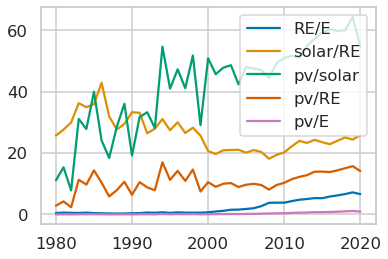

In [161]:
fig, ax = plt.subplots()

data = ["RE/E", "solar/RE", "pv/solar", "pv/RE", "pv/E"]
for d in data:
    ax.plot(df_pub["years"], df_pub[d], label=d)

plt.legend()


In [6]:
df_pub.sum(axis=0)

years             8.200000e+04
pubs_pv           2.178500e+04
pubs_solar        3.890900e+04
pubs_renewable    1.655570e+05
pubs_energy       4.376973e+06
pv/solar          1.715294e+03
solar/RE          1.075257e+03
RE/E              9.143821e+01
pv/RE             4.325775e+02
dtype: float64